In [1]:
import matplotlib
import numpy as np
import pandas as pd
import PersistenceImages.persistence_images as pimg

from ripser import Rips
from matplotlib import cm
from scipy.io import loadmat
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

#### TODO (DB):
- Calculate persistence imgs for all wells and compute Euclidean distance between persistance imgs
    - $\frac{1}{nx \times ny} \sum_{x}\sum_{y} |I_1(x,y) - I_2(x,y)|^2$
    - Separate heatmaps for $H_0$ and $H_1$

#### Load data

In [2]:
exp_dat = loadmat('experimental-data/EGF(E6)w5.mat')
posX = exp_dat['storeX']
posY = exp_dat['storeY']
(max_cells, max_time) = np.shape(posX)
pos_last_x = posX[:, max_time-1]
pos_last_y = posY[:, max_time-1]
pos_last_x = pos_last_x[~np.isnan(pos_last_x)]
pos_last_y = pos_last_y[~np.isnan(pos_last_y)]

#### Compute persistence homology with Ripser

In [3]:
rips = Rips()
dgms = rips.fit_transform(np.transpose(np.array([pos_last_x, pos_last_y])))

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


#### Plot persistence diagram

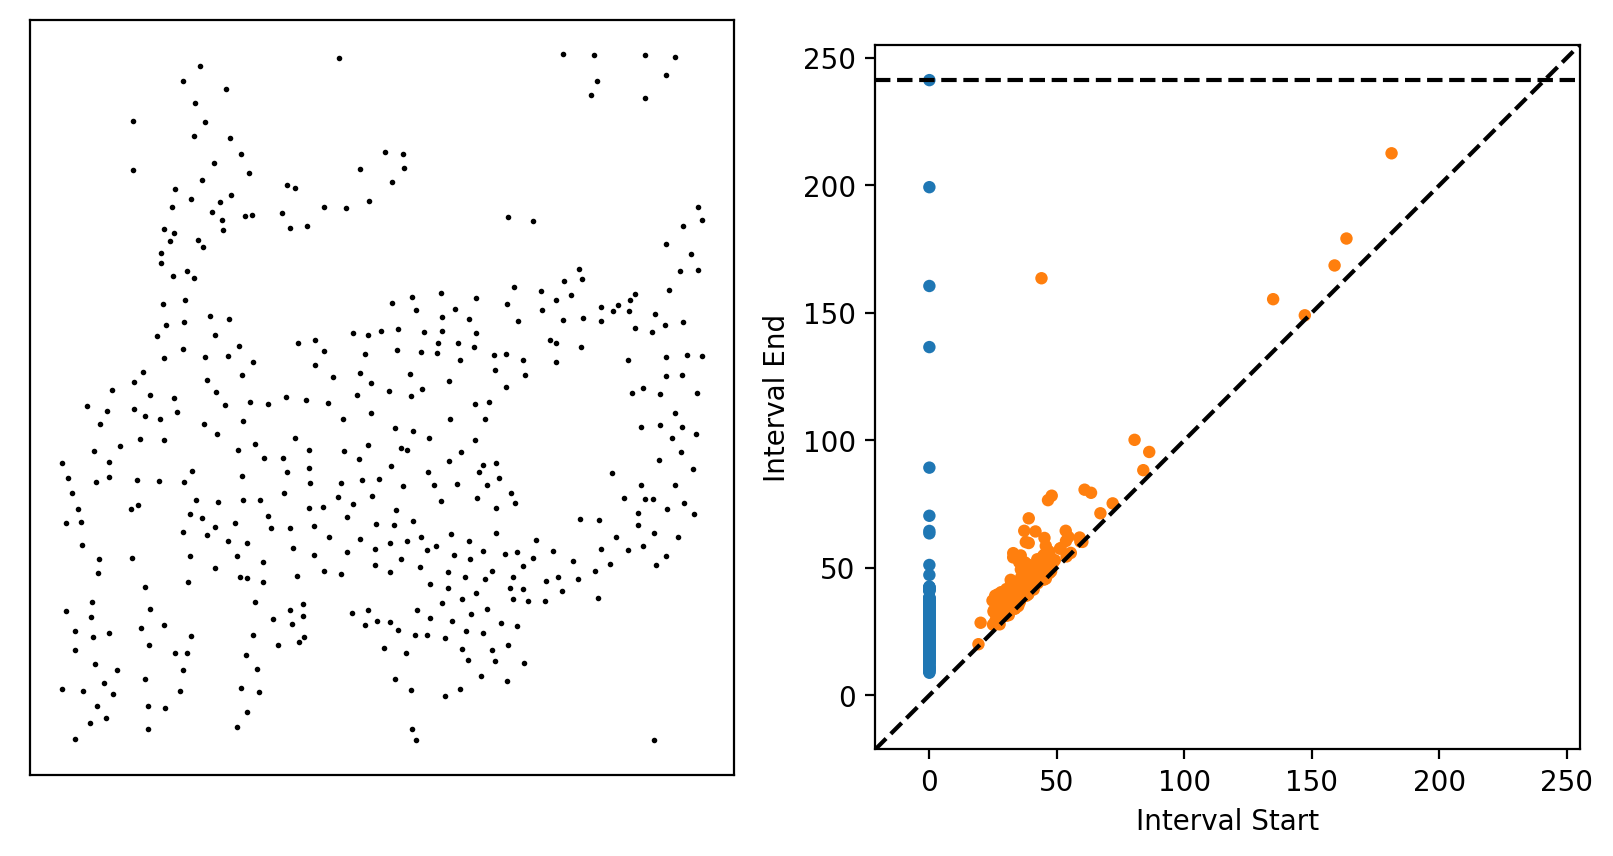

In [4]:
plt.figure(figsize=(10,5), dpi=200)
plt.subplot(121)
plt.scatter(pos_last_x, pos_last_y, s=1, color='black')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.xlabel("Interval Start")
plt.ylabel("Interval End")
plt.show()

#### Compute pesistence image for $H_0$

In [5]:
pers_imager = pimg.PersistenceImager()
pers_imager.pixel_size = 0.05
pers_imager.birth_range = (0, 3)
pers_imager.pers_range = (0, 210)
pers_imager.weight = pimg.weighting_fxns.persistence
pers_imager.weight_params = {'n': 2}
pers_imager.kernel_params = {'sigma': 3.0}
print(pers_imager)

PersistenceImager object: 
  pixel size: 0.05 
  resolution: (60, 4200) 
  birth range: (0, 3) 
  persistence range: (0, 210) 
  weight: persistence 
  kernel: bvncdf 
  weight parameters: {n: 2} 
  kernel parameters: {sigma: 3.0}


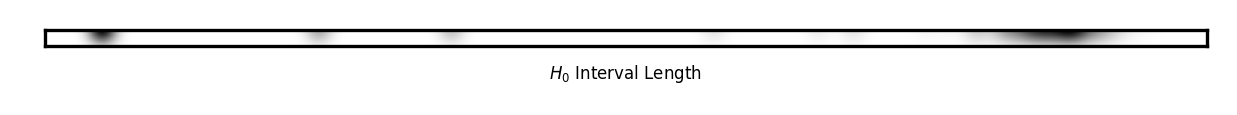

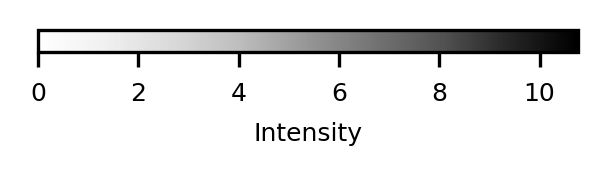

In [6]:
dgms[0][-1] = [0.0, 200]
pers_img_bd = pers_imager.transform(dgms[0], skew=False)
pers_img_bp = pers_imager.transform(dgms[0], skew=True)

rotated_img = np.transpose(np.flipud(np.transpose(pers_img_bd)))
max_intensity = np.max(rotated_img)
min_intensity = np.min(rotated_img)

plt.figure(figsize=(5,5), dpi=300)
plt.imshow(rotated_img, cmap="gray_r")
plt.xticks([])
plt.yticks([])
plt.xlabel('$H_0$ Interval Length', size=4)
plt.show()

fig = plt.figure(figsize=(2, 1), dpi=300)
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.075])
norm = matplotlib.colors.Normalize(vmin=min_intensity, vmax=max_intensity)
cmap = cm.Greys
cb1 = matplotlib.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='horizontal')
cb1.set_label('Intensity', size=6)
cb1.ax.tick_params(labelsize=6)
plt.show()

Text(0, 0.5, 'Image Intensity $\\propto$ Interval Length')

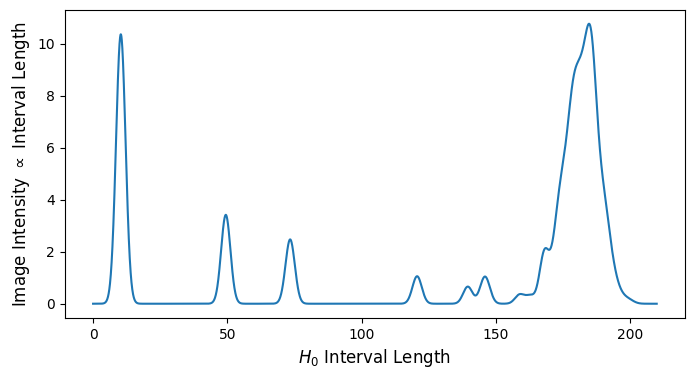

In [7]:
intensity_vals = rotated_img[0,:]
xs = range(0, int(210/0.05))
xs = [x*0.05 for x in xs]
xs = np.round(xs, decimals=2)

plt.figure(figsize=(8, 4), dpi=100)
plt.plot(xs, intensity_vals)
plt.xlabel('$H_0$ Interval Length', size=12)
plt.ylabel('Image Intensity $\propto$ Interval Length', size=12)

#### Compute persistence image for $H_1$

In [8]:
pers_imager = pimg.PersistenceImager()
pers_imager.pixel_size = 0.2
pers_imager.birth_range = (0, 220)
pers_imager.pers_range = (0, 220)
pers_imager.weight = pimg.weighting_fxns.persistence
pers_imager.weight_params = {'n': 1}
pers_imager.kernel_params = {'sigma': 3.0}
print(pers_imager)

PersistenceImager object: 
  pixel size: 0.2 
  resolution: (1100, 1100) 
  birth range: (0, 220) 
  persistence range: (0, 220) 
  weight: persistence 
  kernel: bvncdf 
  weight parameters: {n: 1} 
  kernel parameters: {sigma: 3.0}


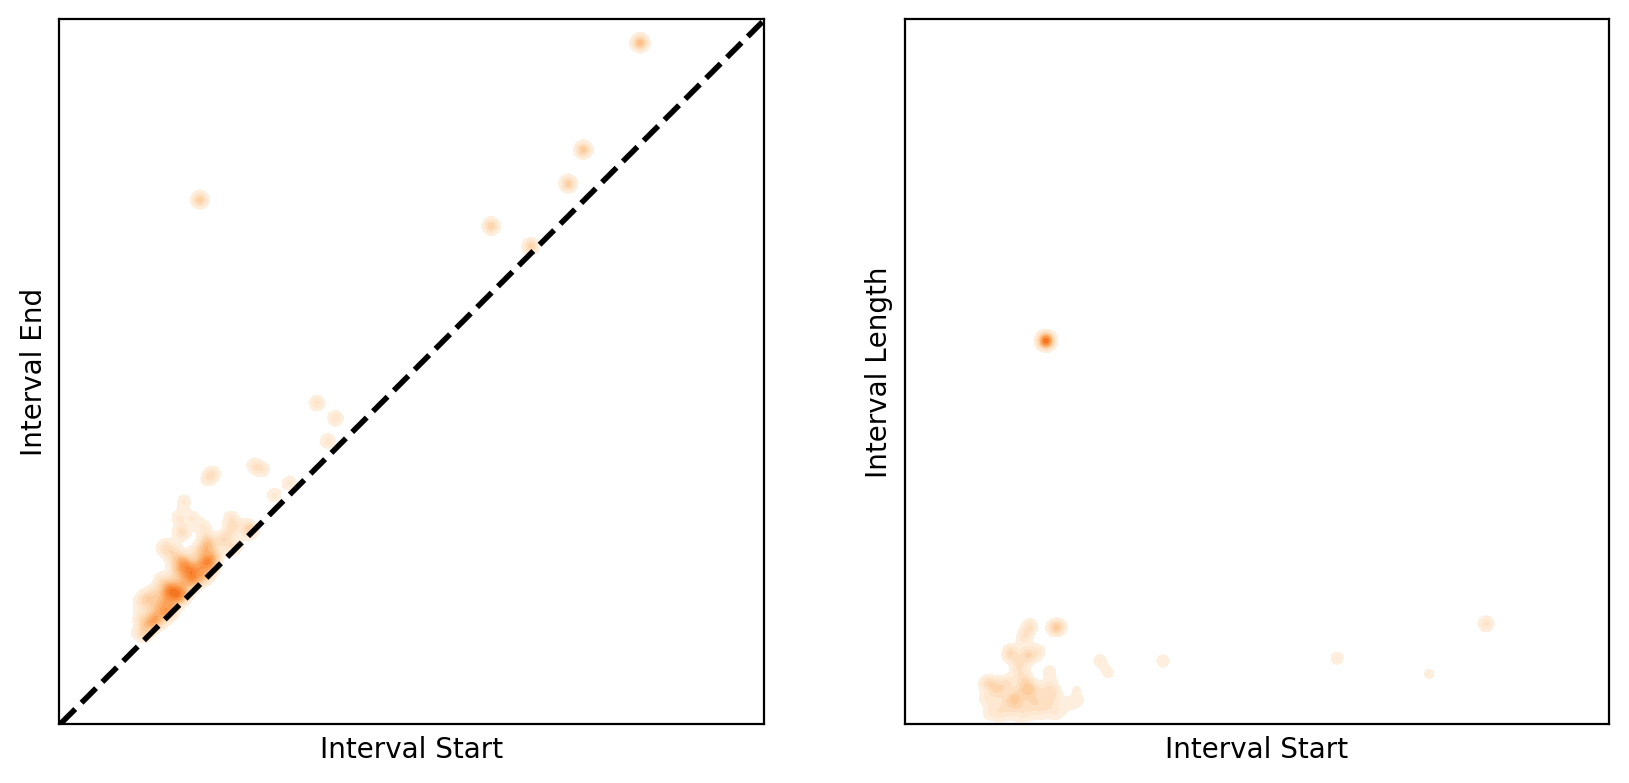

In [9]:
oranges_cmap = cm.get_cmap('Oranges', 20)
newcolors = oranges_cmap(range(12))
white = np.array([1.0, 1.0, 1.0, 1.0])
newcolors[0, :] = white
newcmp = ListedColormap(newcolors)

pers_img_bd = pers_imager.transform(dgms[1], skew=False)
pers_img_bp = pers_imager.transform(dgms[1], skew=True)

persistance_diag_img = np.flipud(np.transpose(pers_img_bd))
x_max = np.shape(persistance_diag_img)[0]
y_max = np.shape(persistance_diag_img)[1]

plt.figure(figsize=(10,5), dpi=200)

xs = range(2, x_max)
ys = [1-x+y_max for x in xs]

plt.subplot(121)
plt.imshow(persistance_diag_img, cmap=newcmp)
plt.plot(xs, ys, '--', linewidth=2, color='black')
plt.xticks([])
plt.yticks([])
plt.xlabel('Interval Start')
plt.ylabel('Interval End')

plt.subplot(122)
plt.imshow(np.flipud(np.transpose(pers_img_bp)), cmap=newcmp)
plt.xticks([])
plt.yticks([])
plt.xlabel('Interval Start')
plt.ylabel('Interval Length')

plt.show()